In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import yaml
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import precision_recall_curve, roc_curve, average_precision_score, roc_auc_score

%matplotlib inline

In [7]:
perp_fp_fmt = '/fs/cbcb-lab/rob/students/noor/shoal_proj/COPD/perp_sal_sub/vb={vb}/{sample}/{fold}/perplexity.yml'

In [14]:
SAMPLES = ['SRR1265603', 'SRR1265604', 'SRR1265502', 'SRR1265504', 'SRR1265501', 'SRR1265601', 'SRR1265497', 'SRR1265500', 'SRR1265600', 'SRR1265499', 'SRR1265595', 'SRR1265602', 'SRR1265598', 'SRR1265495', 
           'SRR1265496', 'SRR1265503', 'SRR1265498', 'SRR1265596', 'SRR1265597', 'SRR1265599']
SAMPLES.sort()
vbpriors = [1e4, 1e3, 1e2, 1e1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
SALMON_QUANTS = {}


In [15]:
def arr_spearman(A, B):
    return spearmanr(A, B).correlation

# Perplexities

In [16]:
def perplexity_plot(sample, vb_priors, folds):
    df = pd.DataFrame()
    for vb_prior in vb_priors:
        #folds_rhos = []
        for fold in range(1, folds + 1):
            #print(perp_fp_fmt.format(rep=rep, cond=cond, vb=vb_prior, fold=fold))
            with open(perp_fp_fmt.format(sample=sample, vb=vb_prior, fold=fold), 'r') as f:
                perp_result = yaml.safe_load(f)
            #folds_rhos.append(rho)
            _vb_prior = float(vb_prior)
            df = df.append(dict(perplexity=perp_result['smoothed_perplexity'],
                                vb_prior=_vb_prior, log_vb_prior = np.log10(_vb_prior),
                                fold=fold), 
                           ignore_index=True)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ax.set_title('Sample {}'.format(sample), fontsize=20)
    sns.lineplot(x="log_vb_prior", y="perplexity", data=df, ax=ax, units="fold", estimator=None, color='#AAAAAA')
    sns.lineplot(x="log_vb_prior", y="perplexity", data=df, ax=ax, err_style=None, lw=3, color="red")
    
    ax.set_ylabel('Perplexity', fontsize=20)
    ax.set_xlabel('Log VBEM prior size', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)

    plt.show()
    
    
    return ax

#perplexity_plot(SAMPLES[0], VB_PRIORS, 5)

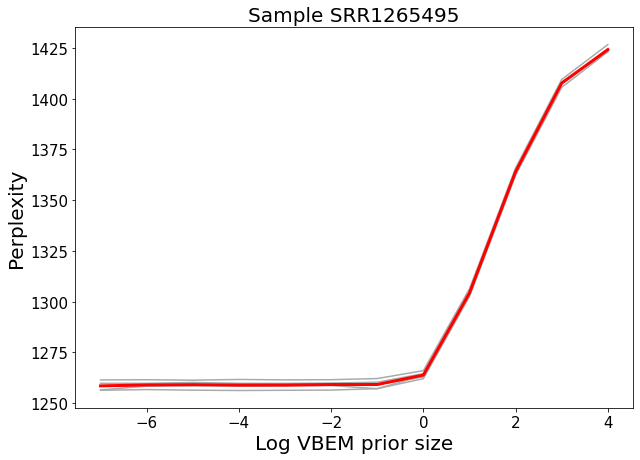

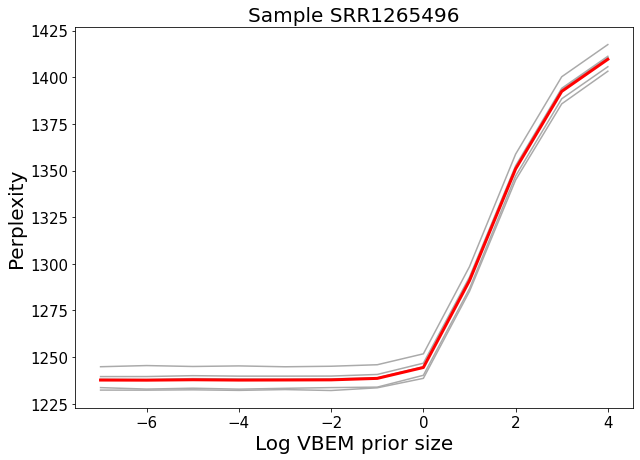

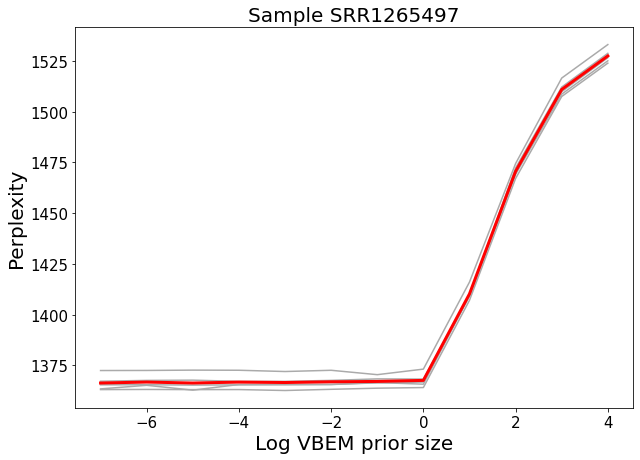

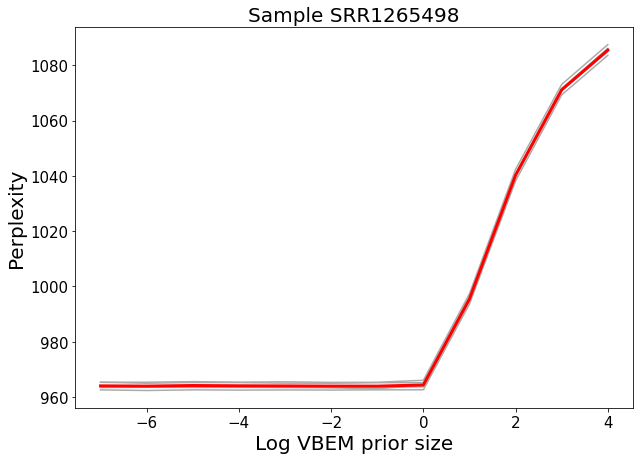

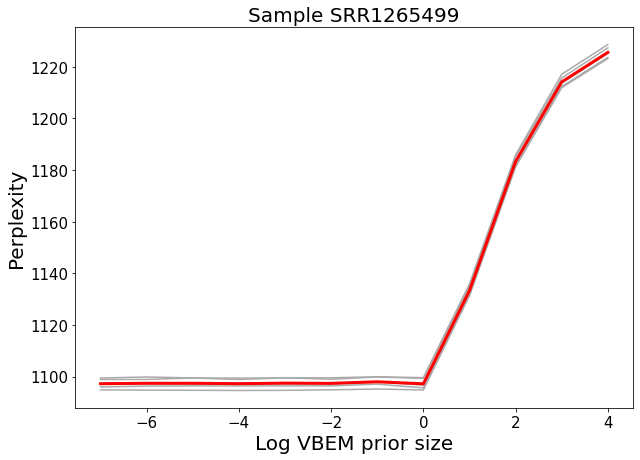

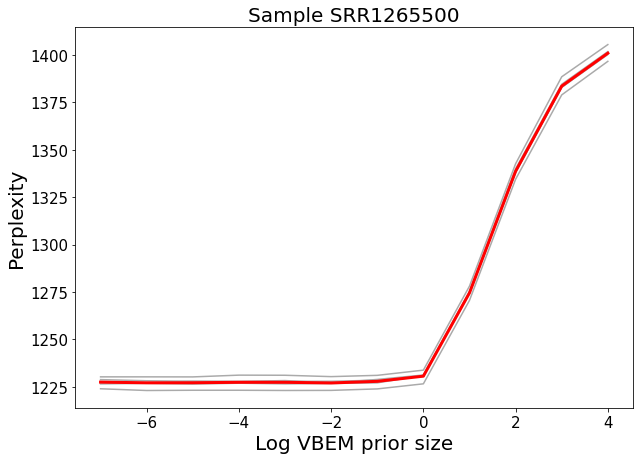

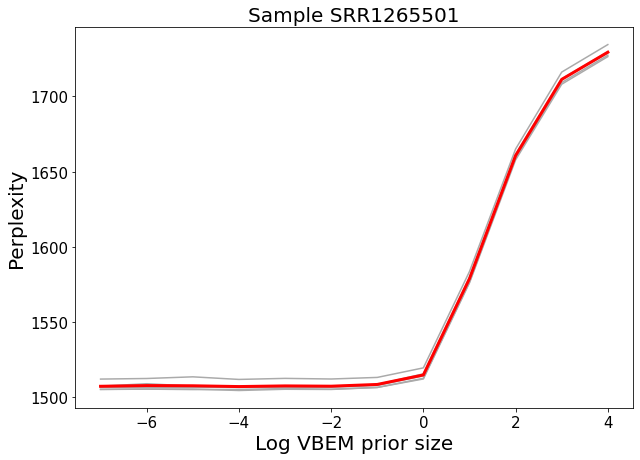

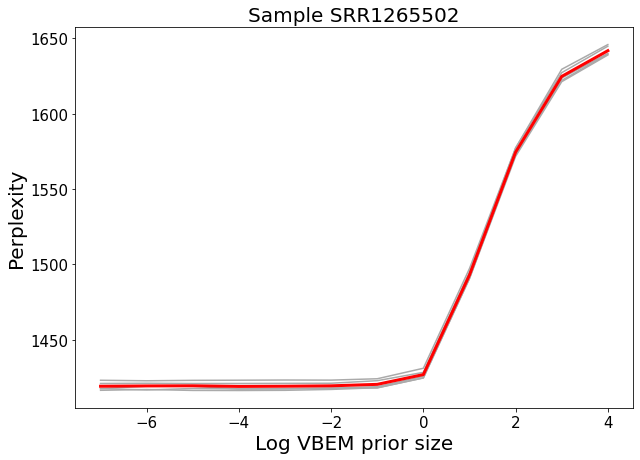

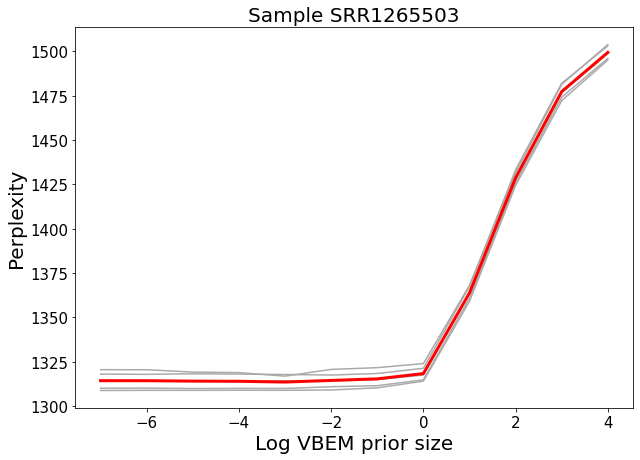

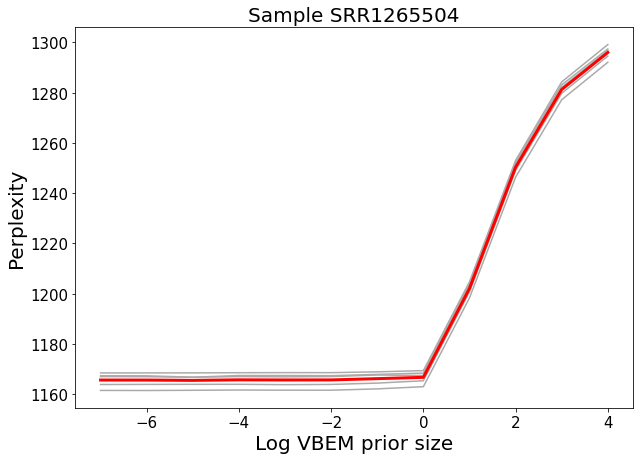

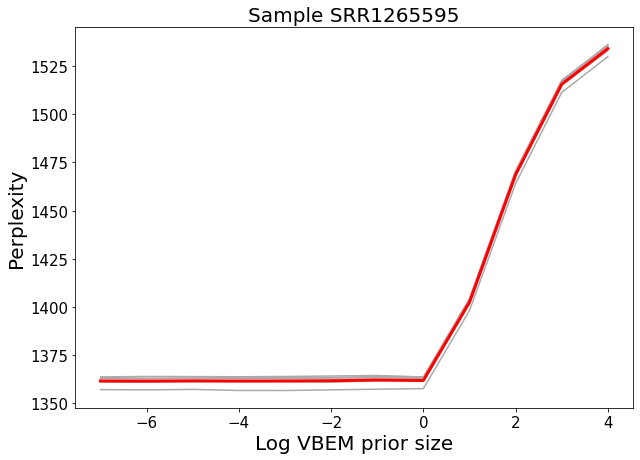

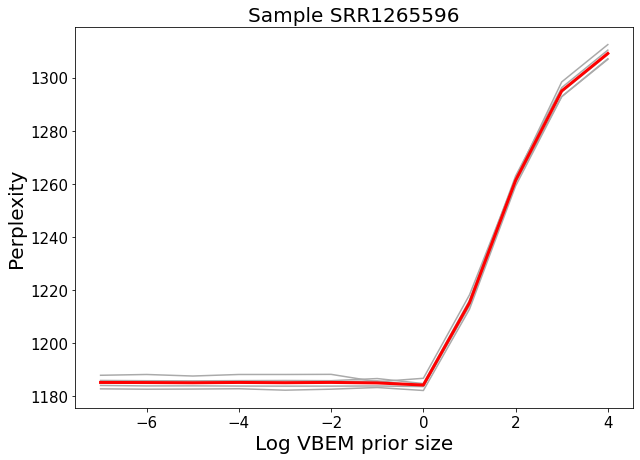

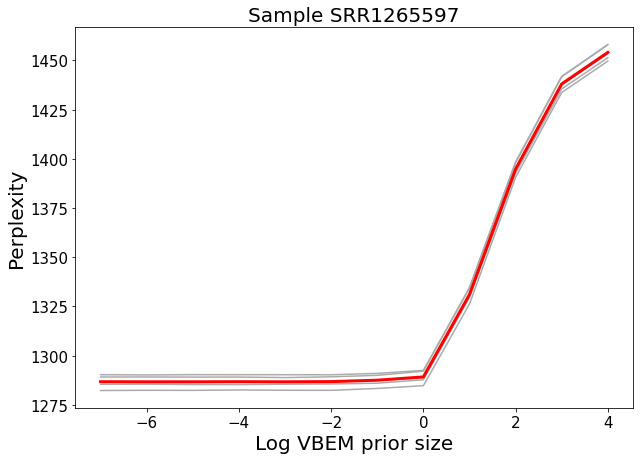

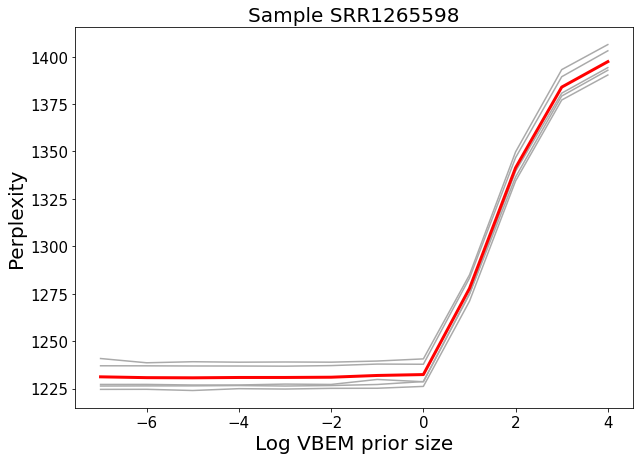

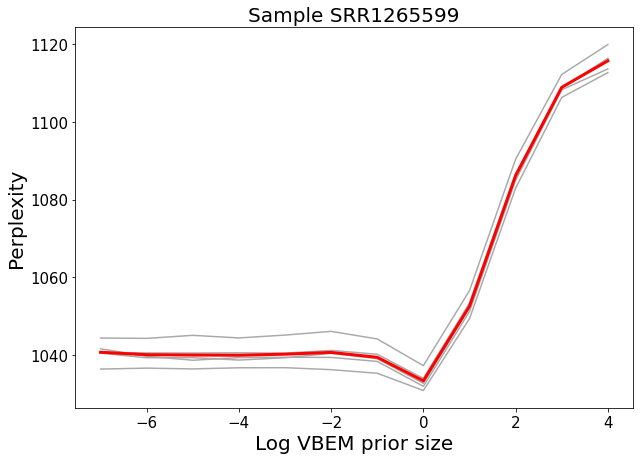

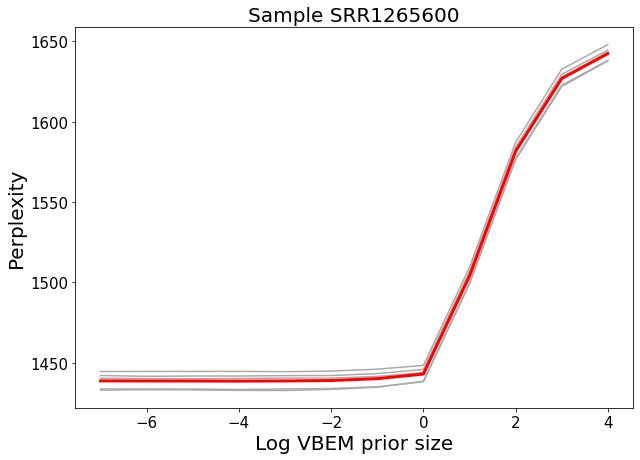

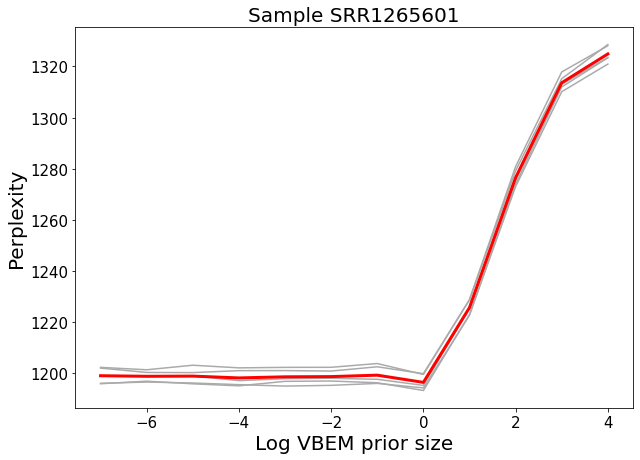

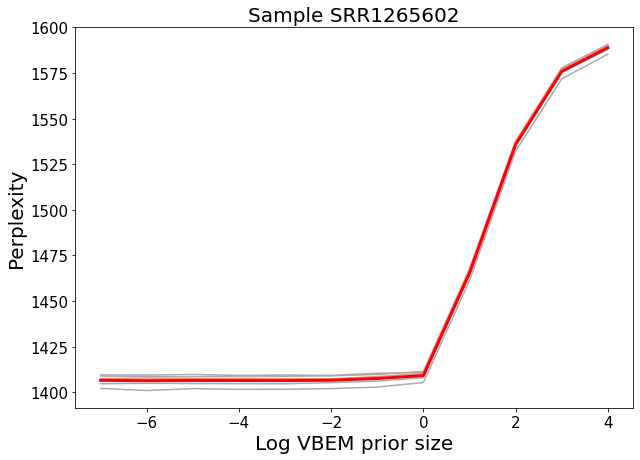

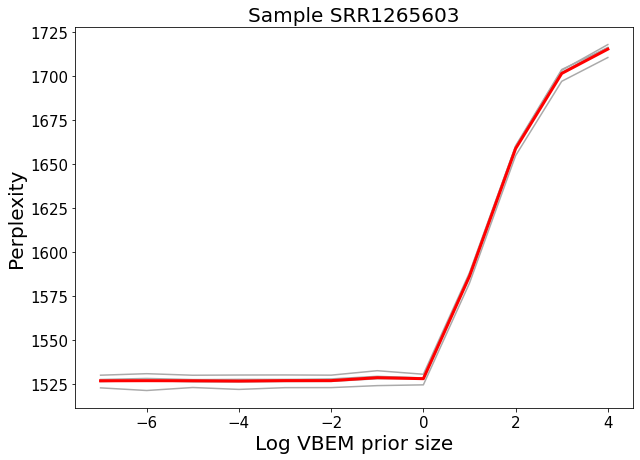

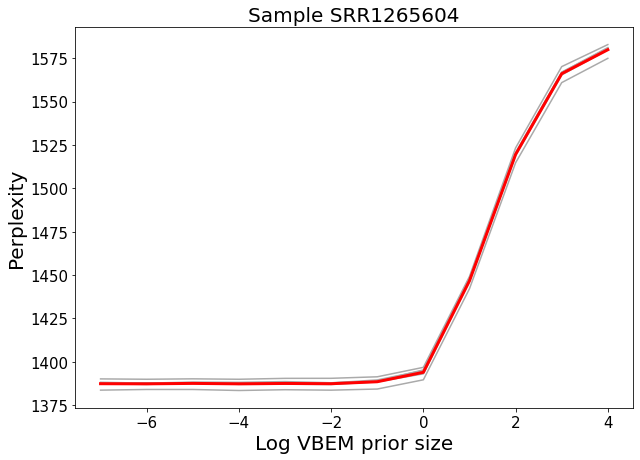

In [17]:
for s in SAMPLES:
    perplexity_plot(s, vbpriors, 5)

In [18]:
vb_sal_sub = {"SRR1265495":1e-1, "SRR1265496":1e-1, "SRR1265497":1, "SRR1265498":1e-1, "SRR1265499":1, "SRR1265600":1e-2, \
            "SRR1265501":1e-2, "SRR1265502":1e-2, "SRR1265503":1e-2, "SRR1265504":1e-1, "SRR1265595":1, "SRR1265596":1, \
            "SRR1265597":1e-2, "SRR1265598":1e-2, "SRR1265599":1, "SRR1265600":1e-2, "SRR1265601":1, "SRR1265602":1e-2, \
            "SRR1265603":1e-2, "SRR1265604":1e-2}

In [26]:
list(vb_sal_sub.values())
list(vb_sal_sub.keys())

['SRR1265495',
 'SRR1265496',
 'SRR1265497',
 'SRR1265498',
 'SRR1265499',
 'SRR1265600',
 'SRR1265501',
 'SRR1265502',
 'SRR1265503',
 'SRR1265504',
 'SRR1265595',
 'SRR1265596',
 'SRR1265597',
 'SRR1265598',
 'SRR1265599',
 'SRR1265601',
 'SRR1265602',
 'SRR1265603',
 'SRR1265604']

In [23]:
for key,val in vb_sal_sub.items():
    print(key, val)

SRR1265495 0.1
SRR1265496 0.1
SRR1265497 1
SRR1265498 0.1
SRR1265499 1
SRR1265600 0.01
SRR1265501 0.01
SRR1265502 0.01
SRR1265503 0.01
SRR1265504 0.1
SRR1265595 1
SRR1265596 1
SRR1265597 0.01
SRR1265598 0.01
SRR1265599 1
SRR1265601 1
SRR1265602 0.01
SRR1265603 0.01
SRR1265604 0.01
